In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score

class Perceptron:
    
    """Creates a Perceptron.
    
    Initialiazes a Perceptron with two weights and one bias.
    """
    
    def __init__(self):  
        """Inits the Perceptron with 'w_1' and 'w_2' as random weights, and 'b' as 
        a random bias."""
        w_1 = np.random.uniform(0.0001, 2)
        w_1 = w_1 if random.random() < 0.5 else -w_1
        w_2 = np.random.uniform(0.0001, 2)
        w_2 = w_2 if random.random() < 0.5 else -w_2
        b = np.random.uniform(0.0001, 2)
        b = b if random.random() < 0.5 else -b
        self.w = [w_1, w_2]
        self.b = b
        
    def train(self, lr, n_inputs):
        """Trains the Perceptron with a specified learning rate and the number
        of inputs."""
        for iteration in range(n_inputs):
            an_X = random.uniform(-25.0, 25.0)
            an_Y = random.uniform(-25.0, 25.0)
            if f(an_X) >= an_Y:
                desired_output = 1
            else:
                desired_output = 0
            inputs = np.array([an_X, an_Y])
            weights = np.array(self.w)
            if np.dot(inputs, weights) + self.b > 0:
                actual_output = 1
            else:
                actual_output = 0
            diff = desired_output - actual_output
            for n in range(len(inputs)):
                self.w[n] = self.w[n] + (lr * inputs[n] * diff)
            self.b = self.b + (lr * diff)
        
    
    def test(self): 
        """Tests a trained Perceptron."""
        precision = 0
        desired_outputs = []
        actual_outputs = []
        for iteration in range(250):
            an_X = random.uniform(-25.0, 25.0)
            an_Y = random.uniform(-25.0, 25.0)
            inputs = np.array([an_X, an_Y])
            weights = np.array(self.w)
            if f(an_X) >= an_Y:
                desired_output = 1
            else:
                desired_output = 0
            desired_outputs.append(desired_output)
            if np.dot(inputs, weights) + self.b > 0:
                actual_output = 1
            else:
                actual_output = 0
            actual_outputs.append(actual_output)
        precision = precision_score(desired_outputs, actual_outputs)
        return precision


def f(x):
    return (-2 * x) - 3

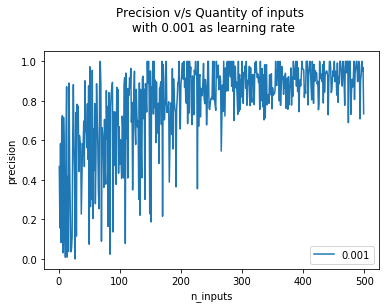

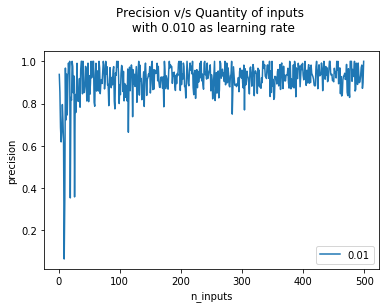

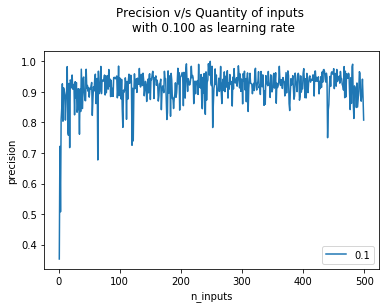

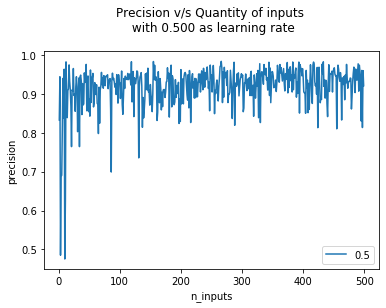

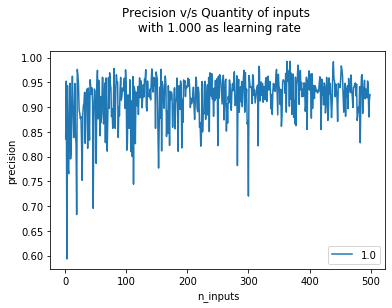

In [130]:
def precision_vs_inputs_plot(learning_rates, n_inputs):
    
    """Plots the precision
    
    Generates a plot of the precision versus the number of inputs.
    
    Args:
      learning_rates: 
        An array with the learning rates to be trained with.
      n_inputs:
        The number of inputs to be trained with.
    """
    
    x_data = range(1, n_inputs)
    for lr in learning_rates:  
        y_precision = []
        for n in range(1, n_inputs):
            my_neuron = Perceptron()
            my_neuron.train(lr, n)
            precision = my_neuron.test()
            y_precision.append(precision)
        title = 'Precision v/s Quantity of inputs \n with {:.3f} as learning rate'.format(lr)
        plt.title(title, loc='center', pad=20.0)
        plt.plot(x_data, y_precision, label=str(lr))
        plt.xlabel('n_inputs')
        plt.ylabel('precision')
        plt.legend()
        plt.show()

np.random.seed(42)
precision_vs_inputs_plot([0.001, 0.01, 0.1, 0.5, 1.0], 500)

In [131]:
import unittest

class PerceptronTestCase(unittest.TestCase):
    
    def setUp(self):
        self.Perceptron = Perceptron()
        self.n_inputs = 100
        self.lr = 0.1
        self.w_1_before = self.Perceptron.w[0]
        self.w_2_before = self.Perceptron.w[1]
        self.b_before = self.Perceptron.b

    def test_preceptron_initializer(self):
        self.assertFalse(self.Perceptron.w[0] is None)
        self.assertFalse(self.Perceptron.w[1] is None)
        self.assertFalse(self.Perceptron.b is None)
    
    def test_train_perceptron(self):
        self.Perceptron.train(self.lr, self.n_inputs)
        self.assertNotEqual(self.w_1_before, self.Perceptron.w[0])
        self.assertNotEqual(self.w_2_before, self.Perceptron.w[1])
        self.assertNotEqual(self.b_before, self.Perceptron.b)
        
    def test_test_perceptron(self):
        precision = self.Perceptron.test()
        self.assertNotEqual(precision, 0)
        self.assertGreater(precision, 0)
        self.assertLessEqual(precision, 1)

        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK
